# Data Preperation and Curation

In [1]:
from google.colab import files
uploaded = files.upload()

Saving EXIST2023_dev.json to EXIST2023_dev.json
Saving EXIST2023_test_clean.json to EXIST2023_test_clean.json
Saving EXIST2023_training.json to EXIST2023_training.json


In [2]:
import pandas as pd
import numpy as np

training_set = pd.read_json("EXIST2023_training.json")
dev_set = pd.read_json("EXIST2023_dev.json")
test_set = pd.read_json("EXIST2023_test_clean.json")

In [3]:
tweets_d = []
labels_d = []
sexism_d = []
tLabels_d = []
sLabels_d = []
otherLang_d = 0
english_d = 0
id_d = []
sexId_d = []

for i in dev_set:  
  countY = 0
  countN = 0

  if (i < 200000) or (i >= 203260 and i <=400001) :
    continue
  id_d.append(int(i))

  tweets_d.append(dev_set[i].tweet)

  for l in dev_set[i].labels_task1:
    if l == 'YES':
      countY +=1
    if l == 'NO':
      countN +=1
  if countY == countN :
    labels_d.append(-1)
  elif countY > countN:
    labels_d.append(1)
    sexId_d.append(i)
    sexism_d.append(dev_set[i].tweet)
    tune = {
        "REPORTED": 0, "JUDGEMENTAL": 0, "DIRECT": 0
    }
    sense = {
        "MISOGYNY-NON-SEXUAL-VIOLENCE":0,
        "IDEOLOGICAL-INEQUALITY": 0, 
        "STEREOTYPING-DOMINANCE": 0, 
        "OBJECTIFICATION": 0, 
        "SEXUAL-VIOLENCE":0, 
        "-1":0
    }
    for m in dev_set[i].labels_task2:
      if m == 'REPORTED':
        tune["REPORTED"] +=1
      if m == 'JUDGEMENTAL':
        tune["JUDGEMENTAL"] +=1
      if m == 'DIRECT':
        tune["DIRECT"] +=1 
    tLabels_d.append(max(tune, key=tune.get))

    for n in dev_set[i].labels_task3:

      if n[0] == 'MISOGYNY-NON-SEXUAL-VIOLENCE':
        sense["MISOGYNY-NON-SEXUAL-VIOLENCE"] +=1
      if n[0] == 'IDEOLOGICAL-INEQUALITY':
        sense["IDEOLOGICAL-INEQUALITY"] +=1
      if n[0] == 'STEREOTYPING-DOMINANCE':
        sense["STEREOTYPING-DOMINANCE"] +=1
      if n[0] == 'OBJECTIFICATION':
        sense["OBJECTIFICATION"] +=1
      if n[0] == 'SEXUAL-VIOLENCE':
        sense["SEXUAL-VIOLENCE"] +=1
      if n[0] == '-':
        sense["-1"] +=1

    sLabels_d.append(max(sense, key=sense.get))
  else:
    labels_d.append(0)



In [4]:
tweets = []
labels = []
sexism = []
tLabels = []
sLabels = []
otherLang = 0
english = 0
id = []
sexId = []

for i in training_set :  
  countY = 0
  countN = 0

  if (i < 200000) or (i >= 203260 and i <=400001) :
    continue
  id.append(int(i))
  # print(detect(df[i].tweet))
  tweets.append(training_set[i].tweet)


  for l in training_set[i].labels_task1:
    if l == 'YES':
      countY +=1
    if l == 'NO':
      countN +=1
  if countY == countN :
    labels.append(-1)
  elif countY > countN:
    labels.append(1)
    sexId.append(i)
    sexism.append(training_set[i].tweet)
    tune = {
        "REPORTED": 0, "JUDGEMENTAL": 0, "DIRECT": 0
    }
    sense = {
        "MISOGYNY-NON-SEXUAL-VIOLENCE":0,
        "IDEOLOGICAL-INEQUALITY": 0, 
        "STEREOTYPING-DOMINANCE": 0, 
        "OBJECTIFICATION": 0, 
        "SEXUAL-VIOLENCE":0, 
        "-1":0
    }
    for m in training_set[i].labels_task2:
      if m == 'REPORTED':
        tune["REPORTED"] +=1
      if m == 'JUDGEMENTAL':
        tune["JUDGEMENTAL"] +=1
      if m == 'DIRECT':
        tune["DIRECT"] +=1 
    tLabels.append(max(tune, key=tune.get))

    for n in training_set[i].labels_task3:

      if n[0] == 'MISOGYNY-NON-SEXUAL-VIOLENCE':
        sense["MISOGYNY-NON-SEXUAL-VIOLENCE"] +=1
      if n[0] == 'IDEOLOGICAL-INEQUALITY':
        sense["IDEOLOGICAL-INEQUALITY"] +=1
      if n[0] == 'STEREOTYPING-DOMINANCE':
        sense["STEREOTYPING-DOMINANCE"] +=1
      if n[0] == 'OBJECTIFICATION':
        sense["OBJECTIFICATION"] +=1
      if n[0] == 'SEXUAL-VIOLENCE':
        sense["SEXUAL-VIOLENCE"] +=1
      if n[0] == '-':
        sense["-1"] +=1

    sLabels.append(max(sense, key=sense.get))
  else:
    labels.append(0)

In [5]:
test_tweets = []
tweet_id_t = []
for i in test_set:
  if i < 600000:
    continue
  tweet_id_t.append(i)
  test_tweets.append(test_set[i].tweet)

In [6]:
df_tweets = pd.DataFrame(
    {'id': id,
     'tweets': tweets,
     'label': labels,
    })

df_sexism = pd.DataFrame(
    {'id': sexId,
     'sexism': sexism,
     'label': sLabels,
    })

dev_tweets = pd.DataFrame( 
    {
        'id': id_d,
     'tweets': tweets_d,
     'label': labels_d,
    })

dev_sexism = pd.DataFrame(
    {'id': sexId_d,
     'sexism': sexism_d,
     'label': sLabels_d
    })

test_set = pd.DataFrame(
    {
        "id": tweet_id_t,
        "tweet": test_tweets
    }
)

In [7]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def data_cleansing(tweet):  
    
    # removal of extra spaces
    re_pattern = re.compile(r'\s+')
    spaceRefined = tweet.str.replace(re_pattern, ' ')

    # removal of @name[mention]
    re_pattern = re.compile(r'@[\w\-]+')
    usernameRefined = spaceRefined.str.replace(re_pattern, '')

    # removal of links[https://abc.com]
    re_pattern =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = usernameRefined.str.replace(re_pattern, '')
    
    # removal of punctuations and numbers
    puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet = puncRefined.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
refinedTweets = data_cleansing(df_tweets.tweets)   
df_tweets['processed_tweets'] = refinedTweets
# print(df_tweets[["tweets","processed_tweets"]].head(10))

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


In [9]:
refinedTweets = data_cleansing(dev_tweets.tweets)   
dev_tweets['processed_tweets'] = refinedTweets
# print(dev_tweets[["tweets","processed_tweets"]].tail(10))

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


In [10]:
refinedTweets = data_cleansing(df_sexism.sexism)   
df_sexism['processed_tweets'] = refinedTweets

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


In [11]:
refinedTweets = data_cleansing(dev_sexism.sexism)   
dev_sexism['processed_tweets'] = refinedTweets
# print(dev_tweets[["tweets","processed_tweets"]].head(10))

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


In [12]:
refinedTweets = data_cleansing(test_set.tweet)   
test_set['processed_tweets'] = refinedTweets
# print(test_set[["tweet","processed_tweets"]].head(10))

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


In [13]:
print(dev_tweets.shape)
print(dev_sexism.shape)

(488, 4)
(194, 4)


In [14]:
frame1 = [dev_tweets.head(244), df_tweets]
frame2 = [dev_sexism.head(97), df_sexism]

In [15]:
mergedDataOfTweets = pd.concat(frame1)
mergedDataOfSexism = pd.concat(frame2)

In [16]:
mergedDataOfTweets.shape

(3503, 4)

In [17]:
mergedDataOfSexism.shape

(1233, 4)

In [ ]:
mergedDataOfTweets = mergedDataOfTweets[mergedDataOfTweets['label'] != -1]
# df_tweets['label'].value_counts()

mergedDataOfSexism = mergedDataOfSexism[mergedDataOfSexism['label'] != "-1"]
# df_sexism['label'].value_counts()

mergedDataOfSexism['label']=mergedDataOfSexism['label'].replace('IDEOLOGICAL-INEQUALITY', 0)
mergedDataOfSexism['label']=mergedDataOfSexism['label'].replace('STEREOTYPING-DOMINANCE', 1)
mergedDataOfSexism['label']=mergedDataOfSexism['label'].replace('OBJECTIFICATION', 2)
mergedDataOfSexism['label']=mergedDataOfSexism['label'].replace('MISOGYNY-NON-SEXUAL-VIOLENCE', 3)
mergedDataOfSexism['label']=mergedDataOfSexism['label'].replace('SEXUAL-VIOLENCE', 4)
# mergedDataOfSexism['label'].value_counts()

In [19]:
mergedDataOfTweets['label'].value_counts()

0    1859
1    1231
Name: label, dtype: int64

In [20]:
mergedDataOfSexism['label'].value_counts()

0    446
1    309
2    216
3    128
4    112
Name: label, dtype: int64

# Sexism Identification

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = tfidf_vectorizer.fit_transform(mergedDataOfTweets['processed_tweets'])

print(tfidf.shape)

X = tfidf
y = mergedDataOfTweets['label'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

(3090, 1749)


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle


rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)


rFacc = 100 * accuracy_score(y_test, y_preds)
pickle.dump(rf, open('RF_Task1.pkl', 'wb'))

In [50]:
pickled_model = pickle.load(open('RF_Task1.pkl', 'rb'))
y_preds = pickled_model.predict(X_test_tfidf)
# report = classification_report( y_test, y_preds )
# print(report)

### Evaluation-Confusion Matrix

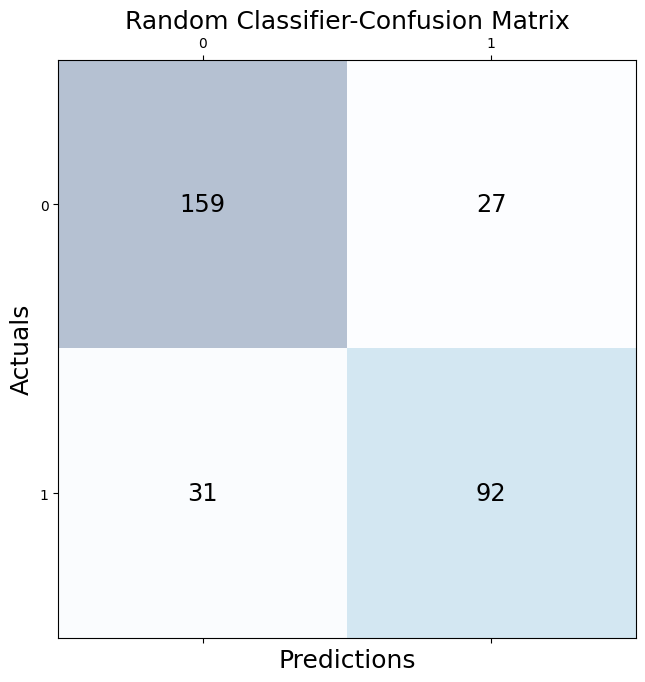

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
 
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_preds)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Random Classifier-Confusion Matrix', fontsize=18)
plt.show()

In [52]:
tn, fp, fn, tp = conf_matrix.ravel()
 
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
precision = tp / (tp + fp)
 
recall = tp / (tp + fn)
 
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormulas:")
print("Accuracy: (TP + TN) / (TP + TN + FP + FN)")
print("Precision: TP / (TP + FP)")
print("Recall: TP / (TP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 

print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))

True Positive (TP):  92
True Negative (TN):  159
False Positive (FP):  27
False Negative (FN):  31


Formulas:
Accuracy: (TP + TN) / (TP + TN + FP + FN)
Precision: TP / (TP + FP)
Recall: TP / (TP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Metrics:
Accuracy:  0.81
Precision:  0.77
Recall:  0.75
F1-score:  0.76


## Support Vector Machine

In [53]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import pickle

svm =LinearSVC(random_state=20)
svm.fit(X_train_tfidf,y_train)
y_preds = svm.predict(X_test_tfidf)


SVMAcc= 100 * accuracy_score(y_test, y_preds)
pickle.dump(svm, open('SVM_Task1.pkl', 'wb'))

In [54]:
pickled_model = pickle.load(open('SVM_Task1.pkl', 'rb'))
y_preds = pickled_model.predict(X_test_tfidf)

### Evluation-Confusion matrix

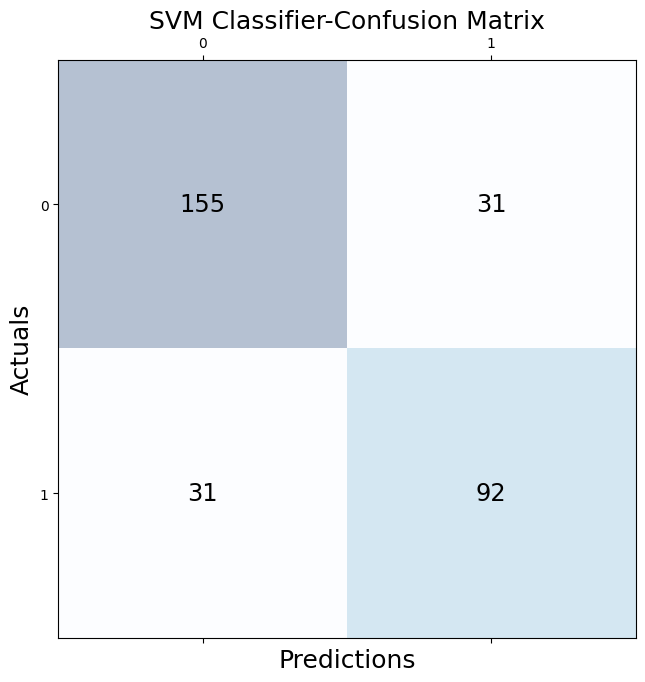

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
 
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_preds)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('SVM Classifier-Confusion Matrix', fontsize=18)
plt.show()

In [56]:
tn, fp, fn, tp = conf_matrix.ravel()
 
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
precision = tp / (tp + fp)
 
recall = tp / (tp + fn)
 
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormulas:")
print("Accuracy: (TP + TN) / (TP + TN + FP + FN)")
print("Precision: TP / (TP + FP)")
print("Recall: TP / (TP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 

print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))

True Positive (TP):  92
True Negative (TN):  155
False Positive (FP):  31
False Negative (FN):  31


Formulas:
Accuracy: (TP + TN) / (TP + TN + FP + FN)
Precision: TP / (TP + FP)
Recall: TP / (TP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Metrics:
Accuracy:  0.8
Precision:  0.75
Recall:  0.75
F1-score:  0.75


## Accuracy comparison of both models

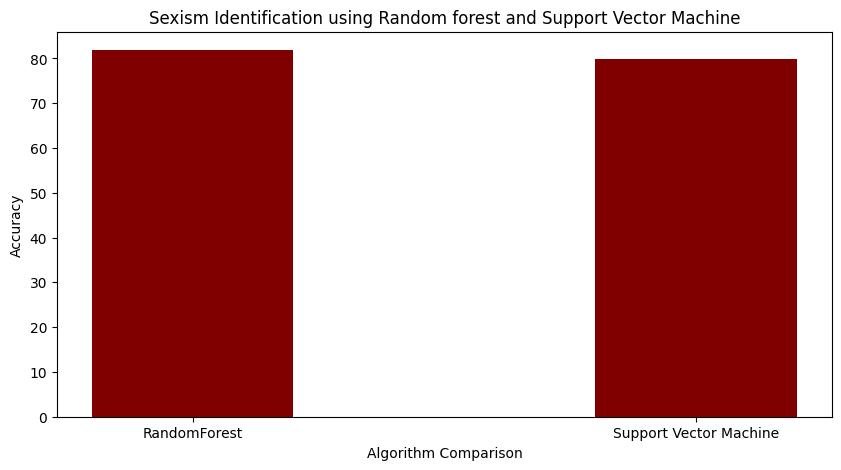

In [37]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'RandomForest':rFacc, 'Support Vector Machine':SVMAcc, }
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("Algorithm Comparison")
plt.ylabel("Accuracy")
plt.title("Sexism Identification using Random forest and Support Vector Machine")
plt.show()


## Model prediction on unseen data ( Test Set )

In [38]:
sexismCategorization = []

result_Task1_Both_Labels = [] 
for id, tweets in test_set.iterrows():
  Test = tfidf_vectorizer.transform(np.array([str(tweets['processed_tweets'])]))
  hardLabel = rf.predict(Test)
  softLabel = rf.predict_proba(Test)
  
  if hardLabel[0] == 1:
    sexismCategorization.append([tweets.id, tweets['processed_tweets']])

  sub = {
      str(tweets.id):
      {
        "Hard Label": "Yes" if hardLabel[0] == 1 else "NO",
        "Soft Label": {"Yes":softLabel[0][1], "No": softLabel[0][0] }
      }
  }
  result_Task1_Both_Labels.append(sub)

import json

with open('Test_set Task 1.json', 'w') as f:
  json.dump(result_Task1_Both_Labels ,f)


# Sexism Categorization

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = tfidf_vectorizer.fit_transform(mergedDataOfSexism['processed_tweets'])

print(tfidf.shape)
X = tfidf
y = mergedDataOfSexism['label'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

(1211, 796)


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pickle


rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)


rFscore = f1_score(y_test, y_preds, average="micro")
pickle.dump(rf, open('RF_Task3.pkl', 'wb'))

In [34]:
pickled_model = pickle.load(open('RF_Task3.pkl', 'rb'))
y_preds = pickled_model.predict(X_test_tfidf)

### Evaluation- Confusion Matrix

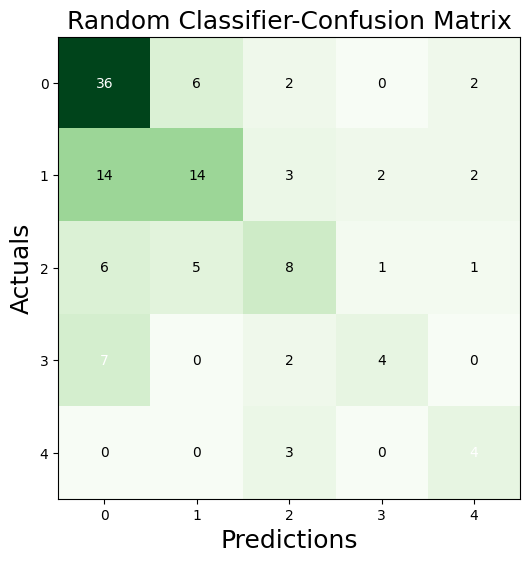

In [41]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Random Classifier-Confusion Matrix', fontsize=18)
plt.show()

In [39]:
report = classification_report( y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.72      0.62        46
           1       0.43      0.34      0.38        35
           2       0.40      0.38      0.39        21
           3       0.50      0.38      0.43        13
           4       0.25      0.14      0.18         7

    accuracy                           0.48       122
   macro avg       0.43      0.39      0.40       122
weighted avg       0.47      0.48      0.47       122



## Support Vector Machine

In [42]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import pickle

svm =LinearSVC(random_state=20)
svm.fit(X_train_tfidf,y_train)
y_preds = svm.predict(X_test_tfidf)


SVMscore= f1_score(y_test, y_preds, average='micro')
pickle.dump(svm, open('SVM_Task3.pkl', 'wb'))

In [43]:
pickled_model = pickle.load(open('SVM_Task3.pkl', 'rb'))
y_preds = pickled_model.predict(X_test_tfidf)


### Evaluation-Confusion Matrix

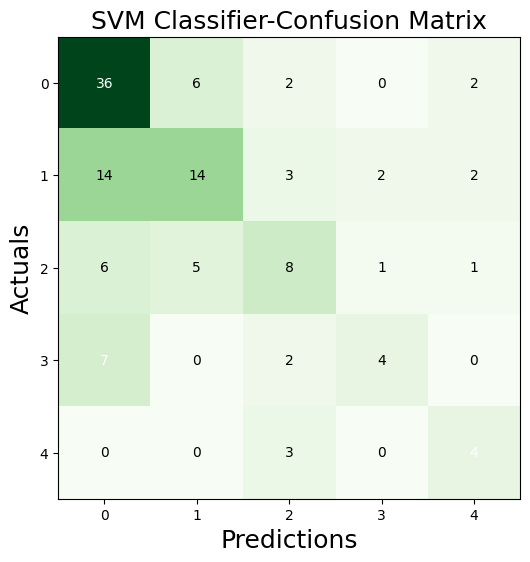

In [44]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('SVM Classifier-Confusion Matrix', fontsize=18)
plt.show()

In [45]:
report = classification_report( y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.72      0.62        46
           1       0.43      0.34      0.38        35
           2       0.40      0.38      0.39        21
           3       0.50      0.38      0.43        13
           4       0.25      0.14      0.18         7

    accuracy                           0.48       122
   macro avg       0.43      0.39      0.40       122
weighted avg       0.47      0.48      0.47       122



## Comparison of F1 Score of both models

In [44]:
print("Random Forest: F1 Score ", rFscore)
print("SVM: F1 Score ", SVMscore)

Random Forest: F1 Score  0.5491803278688525
SVM: F1 Score  0.48360655737704916


## Model prediction on unseen data (Test Set)

In [45]:
task3_Sexism_Category = list()

for id, tweet in sexismCategorization:
  Test = tfidf_vectorizer.transform(np.array([str(tweet)]))
  hardLabel = rf.predict(Test)
  softLabel = rf.predict_proba(Test)

  sub = {
      str(id):
      {
        "Hard Label": "IDEOLOGICAL-INEQUALITY" if hardLabel[0] == 0 else "STEREOTYPING-DOMINANCE" if hardLabel[0] == 1 else "OBJECTIFICATION" if hardLabel[0] == 2 else "MISOGYNY-NON-SEXUAL-VIOLENCE" if hardLabel[0] == 3 else "SEXUAL-VIOLENCE",
        "Soft Label": {"IDEOLOGICAL-INEQUALITY":round(softLabel[0][0],3), "STEREOTYPING-DOMINANCE": round(softLabel[0][1],3), "OBJECTIFICATION": round(softLabel[0][2],3), "MISOGYNY-NON-SEXUAL-VIOLENCE": round(softLabel[0][3],3), "SEXUAL-VIOLENCE": round(softLabel[0][3],3) }
      }
  }

  task3_Sexism_Category.append(sub)

import json

with open('Task 3.json', 'w') as f:
  json.dump(task3_Sexism_Category ,f)